# Data Exploration for Image Classification

This notebook explores the chosen dataset (CIFAR-10 or Animals10) for image classification.

## Objectives:
- Load and inspect the dataset
- Visualize sample images from each class
- Analyze class distribution
- Understand image dimensions and characteristics
- Plan preprocessing strategy

## 1. Setup and Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.15.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Dataset Selection and Loading

Choose between CIFAR-10 or Animals10 dataset.

In [ ]:
# Dataset choice - modify this to switch between datasets
DATASET_CHOICE = "animals10"  # Options: "cifar10" or "animals10"
import kagglehub
print("Download from: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data")
path = kagglehub.dataset_download("alessiocorrado99/animals10")
print("Path to dataset files:", path) 




# Placeholder - implement Animals10 loading
# data_dir = "../data/animals10/"  
# Load using tf.keras.preprocessing.image_dataset_from_directory

class_names = ['dog', 'cat', 'horse', 'spider', 'butterfly', 
                'chicken', 'sheep', 'cow', 'squirrel', 'elephant']

/Users/smithn5/ironhack/image_class_project_ih/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download from: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data


100%|██████████| 586M/586M [08:11<00:00, 1.25MB/s] 

Extracting files...


Path to dataset files: /Users/smithn5/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


## 3. Dataset Overview and Statistics

In [ ]:
import os
os.listdir(path)


In [ ]:
# load datasets for exploration animals10
# use image_dataset_from_directory to load the dataset



In [ ]:
# Load the dataset using tf.keras.preprocessing.image.ImageDataGenerator
batch_size = 32
img_height = 64
img_width = 64

# Create ImageDataGenerator with validation split
datacontainer = ImageDataGenerator(
    validation_split=0.1,  # 10% for validation
    rescale=1/255,  # Normalize
    fill_mode='nearest', #intropulotion
    


)

# Create training dataset
train_ds = datacontainer.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="training",
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation dataset
val_ds = datacontainer.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="validation",
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Get class names from the dataset
class_names = list(train_ds.class_indices.keys())
print(f"Found {len(class_names)} classes: {class_names}")

# Calculate dataset sizes
print(f"Training samples: {train_ds.samples}")
print(f"Validation samples: {val_ds.samples}")
print(f"Training batches per epoch: {len(train_ds)}")
print(f"Validation batches per epoch: {len(val_ds)}")
print(f"Batch size: {batch_size}")

# Show class indices mapping
print(f"\nClass indices mapping:")
for class_name, index in train_ds.class_indices.items():
    print(f"  {class_name}: {index}")
 

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.
Found 10 classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Training samples: 20947
Validation samples: 5232
Training batches per epoch: 655
Validation batches per epoch: 164
Batch size: 32

Class indices mapping:
  cane: 0
  cavallo: 1
  elefante: 2
  farfalla: 3
  gallina: 4
  gatto: 5
  mucca: 6
  pecora: 7
  ragno: 8
  scoiattolo: 9
Found 5232 images belonging to 10 classes.
Found 10 classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Training samples: 20947
Validation samples: 5232
Training batches per epoch: 655
Validation batches per epoch: 164
Batch size: 32

Class indices mapping:
  cane: 0
  cavallo: 1
  elefante: 2
  farfalla: 3
  gallina: 4
  gatto: 5
  mucca: 6
  pecora: 7
  ragno: 8
  scoiattolo: 9


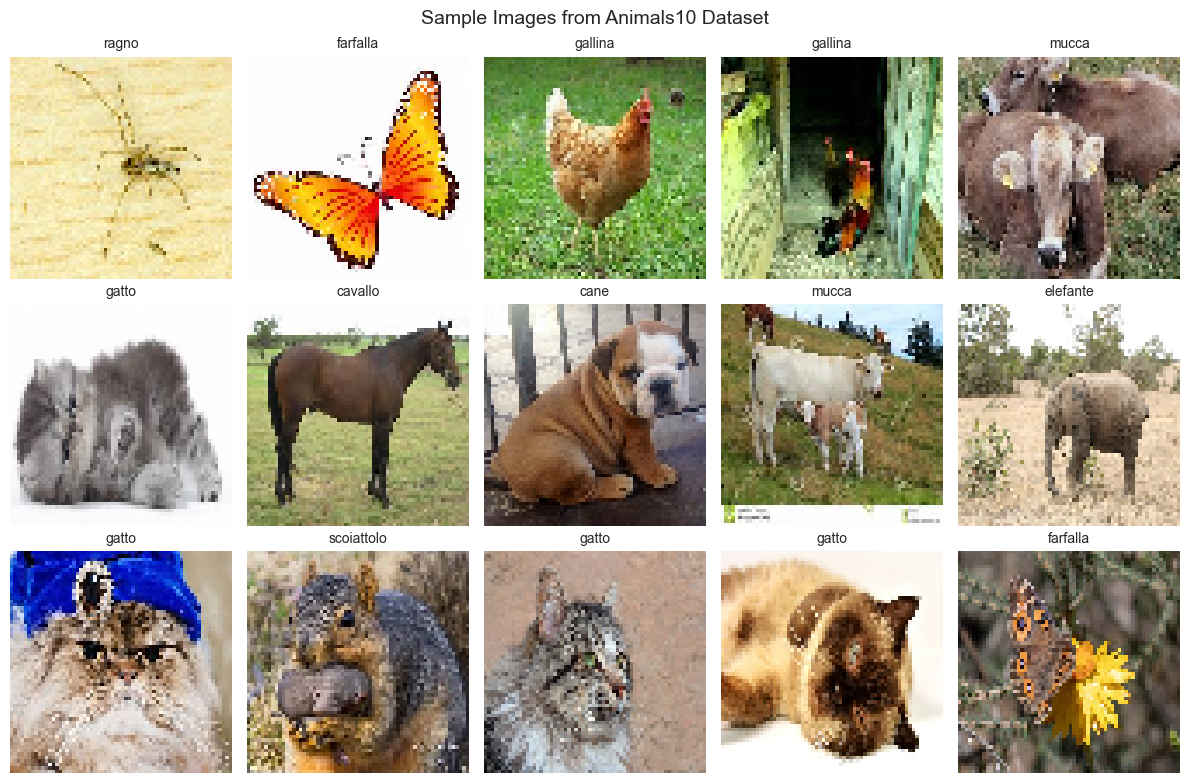


Image statistics:
Image shape: (64, 64, 3)
Data type: float32
Min pixel value: 0.000
Max pixel value: 1.000
Mean pixel value: 0.494
Labels shape: (10,)
Labels type: One-hot encoded (categorical)


In [44]:
# Display sample images from the dataset with their labels
plt.figure(figsize=(12, 8))

# Get one batch from the training dataset
batch_images, batch_labels = next(train_ds)

# Display the first 15 images from the batch
num_images = min(15, len(batch_images))
for i in range(num_images):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Images are already normalized to [0,1] by rescale=1./255
    img = batch_images[i]
    plt.imshow(img)
    
    # Get class name from one-hot encoded label
    class_idx = np.argmax(batch_labels[i])
    class_name = class_names[class_idx]
    plt.title(f'{class_name}', fontsize=10)

plt.suptitle('Sample Images from Animals10 Dataset', fontsize=14)
plt.tight_layout()
plt.show()

# Show pixel value statistics
print(f"\nImage statistics:")
print(f"Image shape: {batch_images[0].shape}")
print(f"Data type: {batch_images.dtype}")
print(f"Min pixel value: {np.min(batch_images):.3f}")
print(f"Max pixel value: {np.max(batch_images):.3f}")
print(f"Mean pixel value: {np.mean(batch_images):.3f}")
print(f"Labels shape: {batch_labels[0].shape}")
print(f"Labels type: One-hot encoded (categorical)")

# Reset the generator for future use
train_ds.reset()

## 4. Class Distribution Analysis

Analyzing class distribution...
Counting training samples...
Counting validation samples...
Counting validation samples...


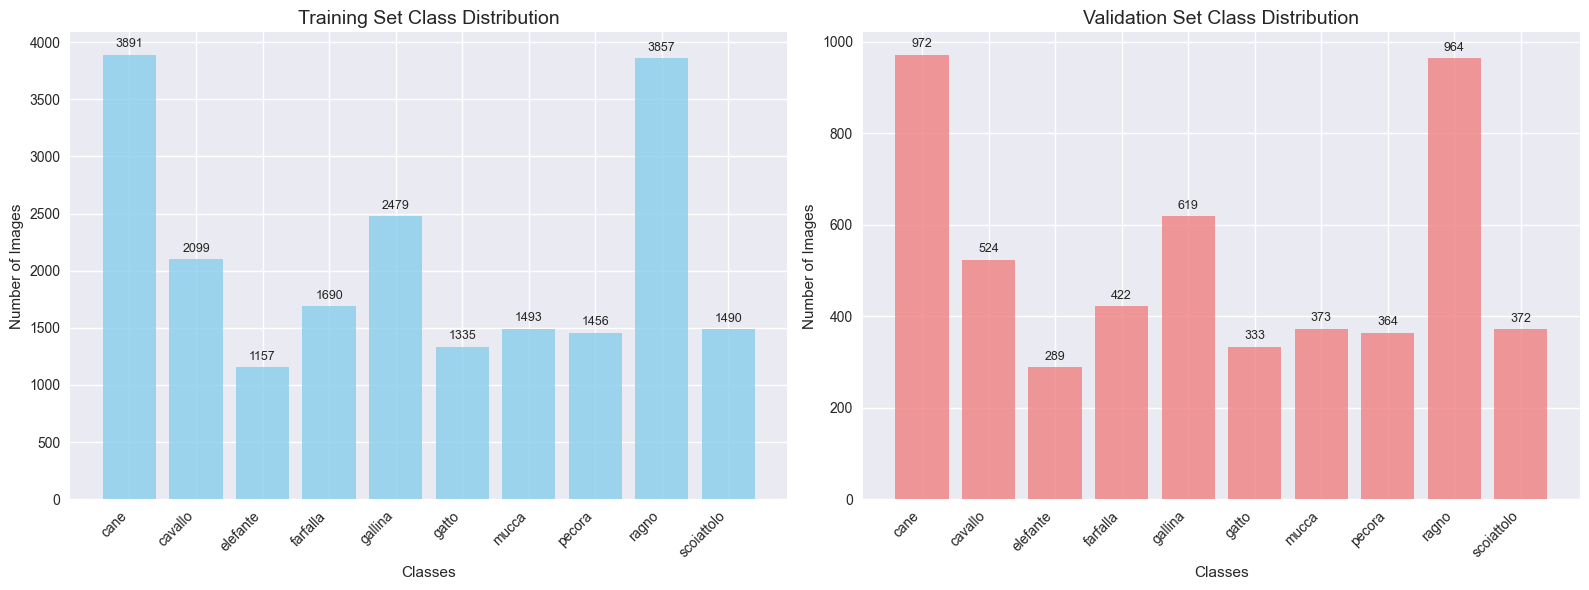


CLASS DISTRIBUTION SUMMARY
Total images: 26179
Training images: 20947 (80.0%)
Validation images: 5232 (20.0%)

Per-class breakdown:
--------------------------------------------------
cane         | Train: 3891 ( 18.6%) | Val:  972 ( 18.6%) | Total: 4863
cavallo      | Train: 2099 ( 10.0%) | Val:  524 ( 10.0%) | Total: 2623
elefante     | Train: 1157 (  5.5%) | Val:  289 (  5.5%) | Total: 1446
farfalla     | Train: 1690 (  8.1%) | Val:  422 (  8.1%) | Total: 2112
gallina      | Train: 2479 ( 11.8%) | Val:  619 ( 11.8%) | Total: 3098
gatto        | Train: 1335 (  6.4%) | Val:  333 (  6.4%) | Total: 1668
mucca        | Train: 1493 (  7.1%) | Val:  373 (  7.1%) | Total: 1866
pecora       | Train: 1456 (  7.0%) | Val:  364 (  7.0%) | Total: 1820
ragno        | Train: 3857 ( 18.4%) | Val:  964 ( 18.4%) | Total: 4821
scoiattolo   | Train: 1490 (  7.1%) | Val:  372 (  7.1%) | Total: 1862


In [45]:
# Analyze class distribution for Animals10 dataset
if DATASET_CHOICE == "animals10":
    print("Analyzing class distribution...")
    
    # Get class counts from the generators
    train_class_counts = [0] * len(class_names)
    val_class_counts = [0] * len(class_names)
    
    # Count training set classes
    print("Counting training samples...")
    train_ds.reset()  # Reset generator to start from beginning
    for i in range(len(train_ds)):
        batch_images, batch_labels = next(train_ds)
        # Convert one-hot labels to class indices and count
        class_indices = np.argmax(batch_labels, axis=1)
        for class_idx in class_indices:
            train_class_counts[class_idx] += 1
    
    # Count validation set classes
    print("Counting validation samples...")
    val_ds.reset()  # Reset generator to start from beginning
    for i in range(len(val_ds)):
        batch_images, batch_labels = next(val_ds)
        # Convert one-hot labels to class indices and count
        class_indices = np.argmax(batch_labels, axis=1)
        for class_idx in class_indices:
            val_class_counts[class_idx] += 1
    
    # Create distribution plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Training set distribution
    bars1 = ax1.bar(range(len(class_names)), train_class_counts, color='skyblue', alpha=0.8)
    ax1.set_title('Training Set Class Distribution', fontsize=14)
    ax1.set_xlabel('Classes')
    ax1.set_ylabel('Number of Images')
    ax1.set_xticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, count in zip(bars1, train_class_counts):
        if count > 0:  # Only show label if there are images
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(train_class_counts)*0.01, 
                    str(count), ha='center', va='bottom', fontsize=9)
    
    # Validation set distribution
    bars2 = ax2.bar(range(len(class_names)), val_class_counts, color='lightcoral', alpha=0.8)
    ax2.set_title('Validation Set Class Distribution', fontsize=14)
    ax2.set_xlabel('Classes')
    ax2.set_ylabel('Number of Images')
    ax2.set_xticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, count in zip(bars2, val_class_counts):
        if count > 0:  # Only show label if there are images
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(val_class_counts)*0.01, 
                    str(count), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*50)
    print("CLASS DISTRIBUTION SUMMARY")
    print("="*50)
    total_train = sum(train_class_counts)
    total_val = sum(val_class_counts)
    total_images = total_train + total_val
    
    print(f"Total images: {total_images}")
    print(f"Training images: {total_train} ({total_train/total_images*100:.1f}%)")
    print(f"Validation images: {total_val} ({total_val/total_images*100:.1f}%)")
    print("\nPer-class breakdown:")
    print("-" * 50)
    
    for i, class_name in enumerate(class_names):
        total_class = train_class_counts[i] + val_class_counts[i]
        train_pct = train_class_counts[i]/total_train*100 if total_train > 0 else 0
        val_pct = val_class_counts[i]/total_val*100 if total_val > 0 else 0
        print(f"{class_name:12} | Train: {train_class_counts[i]:4d} ({train_pct:5.1f}%) | Val: {val_class_counts[i]:4d} ({val_pct:5.1f}%) | Total: {total_class:4d}")
    
    # Reset generators for future use
    train_ds.reset()
    val_ds.reset()

## 5. Sample Image Visualization

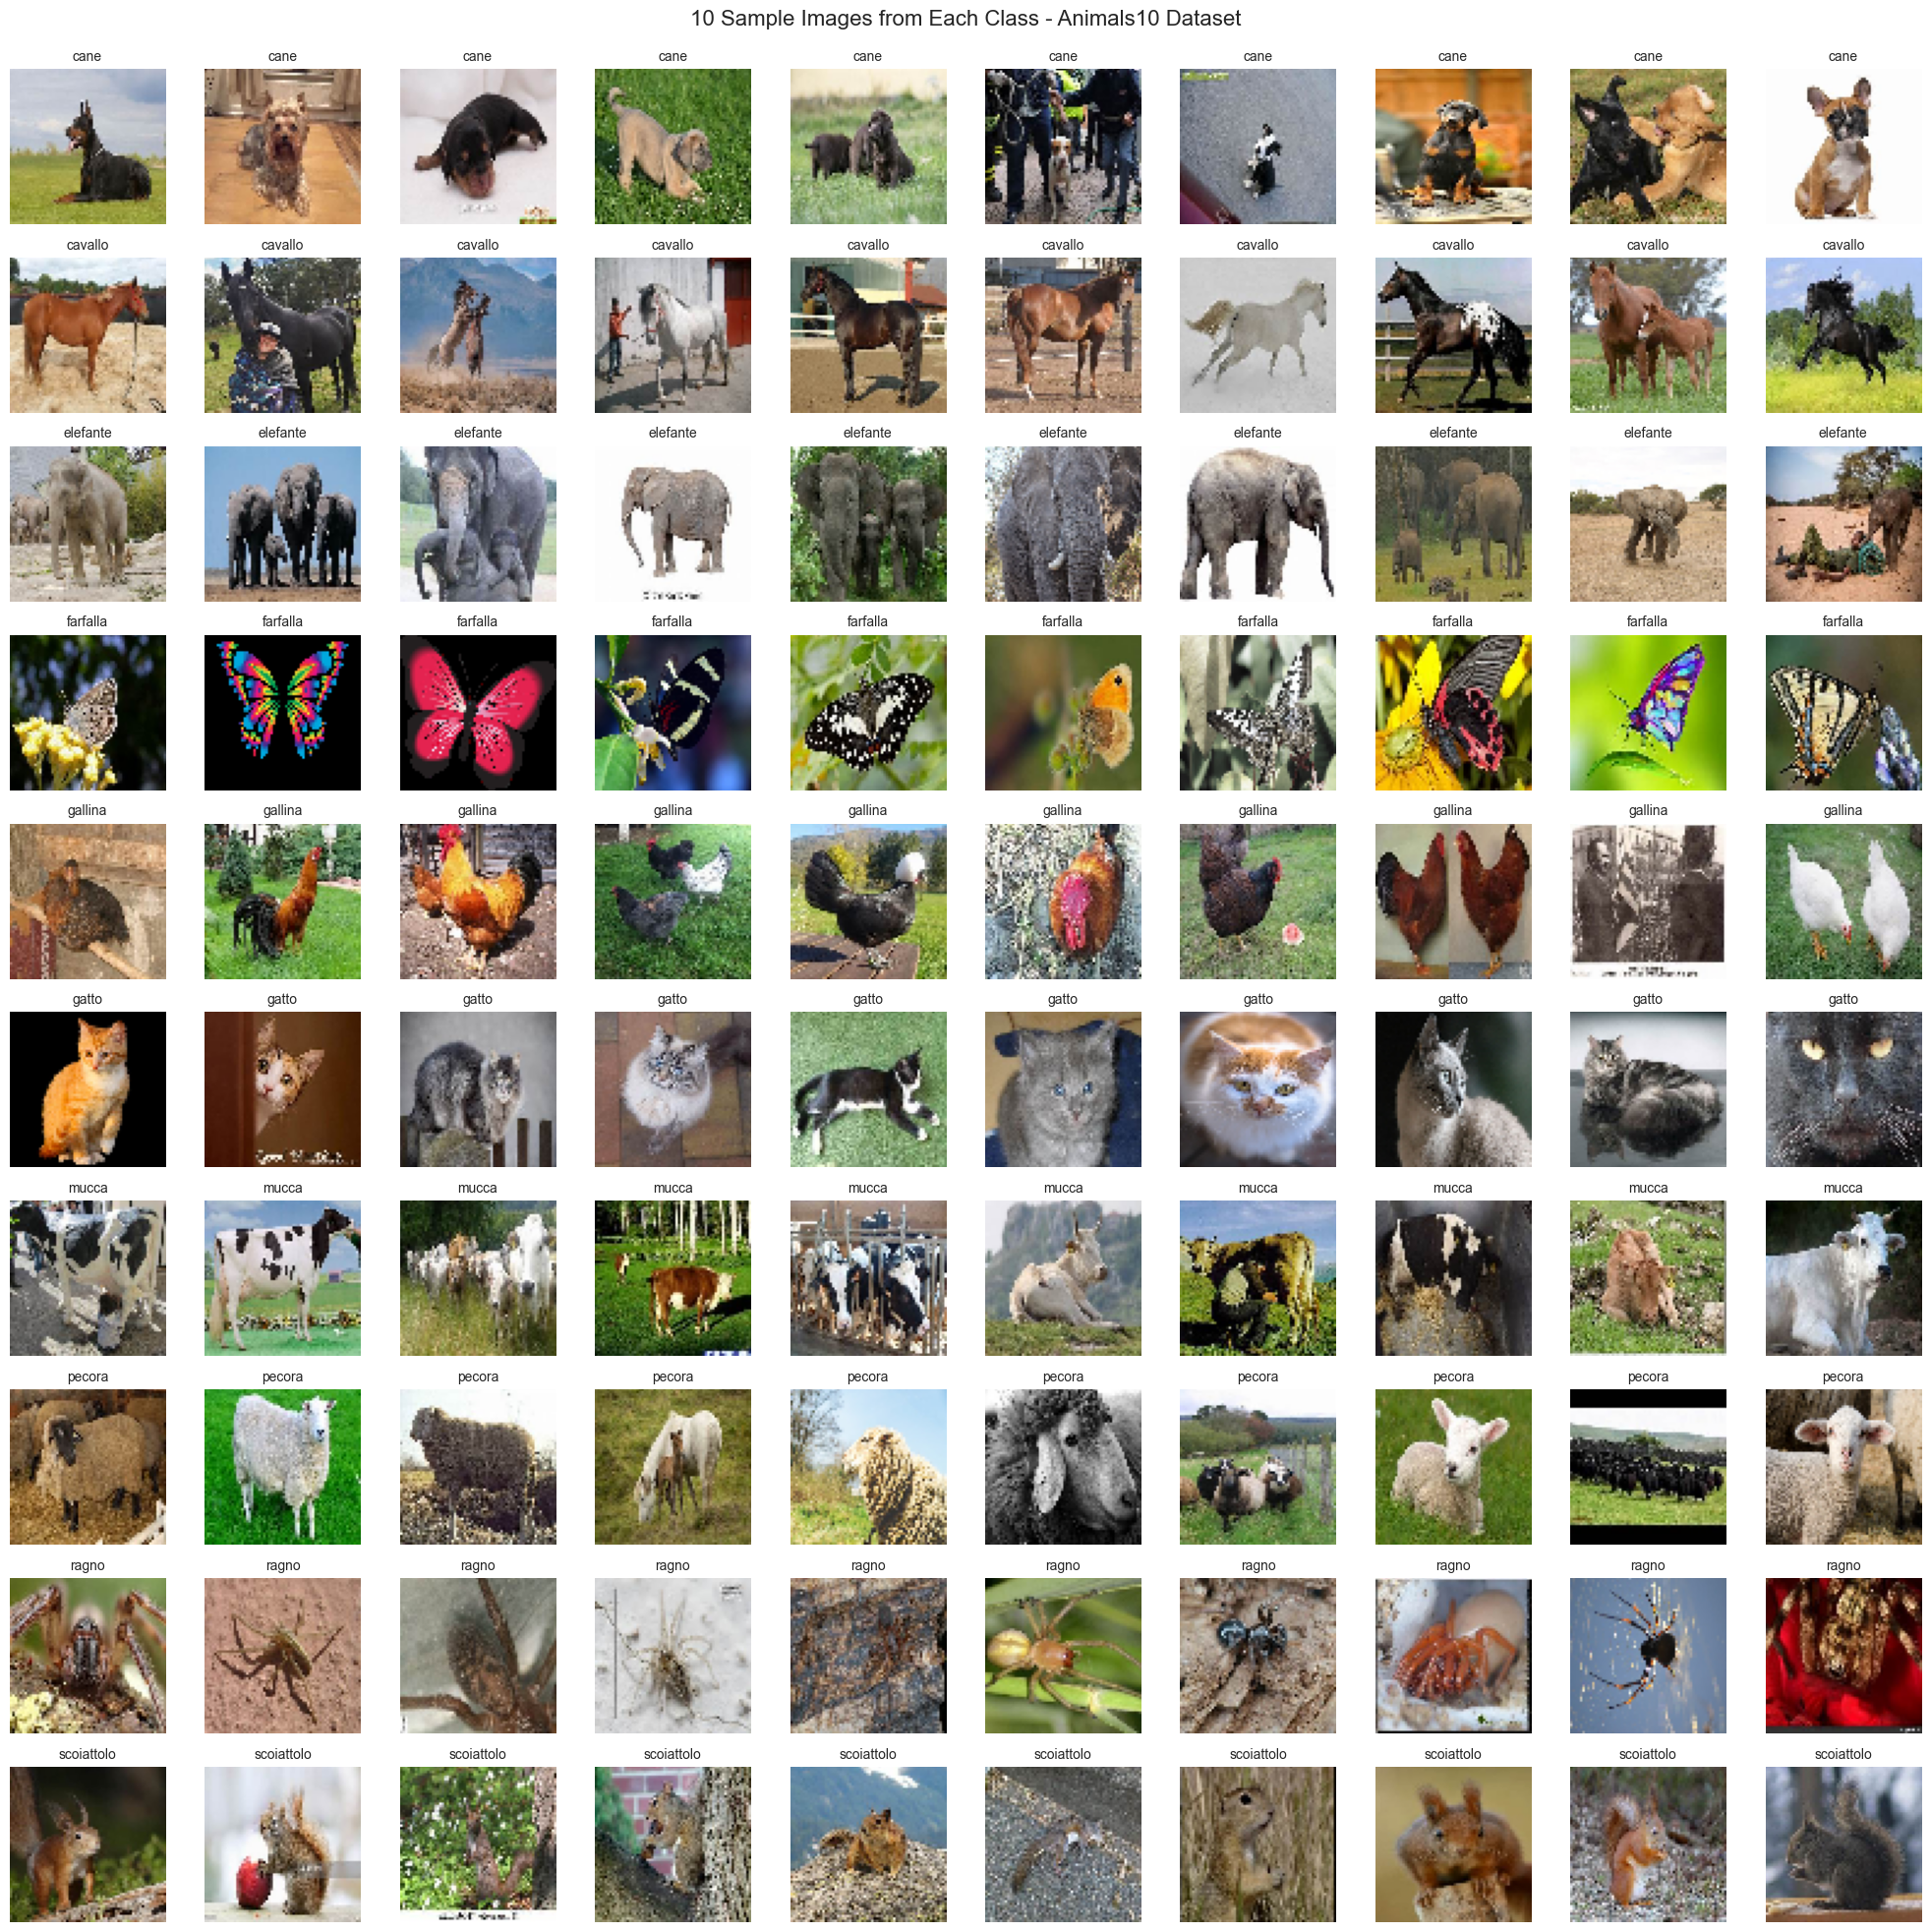


Sample collection summary:
----------------------------------------
cane        : 10/10 samples collected
cavallo     : 10/10 samples collected
elefante    : 10/10 samples collected
farfalla    : 10/10 samples collected
gallina     : 10/10 samples collected
gatto       : 10/10 samples collected
mucca       : 10/10 samples collected
pecora      : 10/10 samples collected
ragno       : 10/10 samples collected
scoiattolo  : 10/10 samples collected


In [ ]:
# Show 10 samples from each class
if DATASET_CHOICE == "animals10":
    print("Collecting 10 samples from each class...")
    
    # Dictionary to store images for each class
    class_images = {i: [] for i in range(len(class_names))}
    samples_per_class = 10
    
    # Reset generator and collect samples
    train_ds.reset()
    
    # Collect samples until we have enough for each class
    max_batches = len(train_ds) * 2  # Safety limit
    batch_count = 0
    
    while batch_count < max_batches:
        try:
            batch_images, batch_labels = next(train_ds)
            
            # Process each image in the batch
            for img, label in zip(batch_images, batch_labels):
                class_idx = np.argmax(label)
                
                # Add image if we need more samples for this class
                if len(class_images[class_idx]) < samples_per_class:
                    class_images[class_idx].append(img)
            
            # Check if we have enough samples for all classes
            if all(len(imgs) >= samples_per_class for imgs in class_images.values()):
                break
                
            batch_count += 1
            
        except StopIteration:
            # Reset generator if we reach the end
            train_ds.reset()
            batch_count += 1
    
    # Create a large figure to display all samples
    fig, axes = plt.subplots(len(class_names), samples_per_class, 
                           figsize=(samples_per_class*2, len(class_names)*2))
    
    # Plot samples for each class
    for class_idx, class_name in enumerate(class_names):
        for sample_idx in range(samples_per_class):
            row = class_idx
            col = sample_idx
            
            if len(class_images[class_idx]) > sample_idx:
                img = class_images[class_idx][sample_idx]
                axes[row, col].imshow(img)
                axes[row, col].set_title(f'{class_name}', fontsize=10)
            else:
                # If we don't have enough samples, show empty plot
                axes[row, col].text(0.5, 0.5, 'No more\nsamples', 
                                  ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{class_name} (empty)', fontsize=10)
            
            axes[row, col].axis('off')
    
    plt.suptitle('10 Sample Images from Each Class - Animals10 Dataset', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
    # Print summary
    print("\nSample collection summary:")
    print("-" * 40)
    for class_idx, class_name in enumerate(class_names):
        collected = len(class_images[class_idx])
        print(f"{class_name:12}: {collected:2d}/{samples_per_class} samples collected")
    
    # Reset generator for future use
    train_ds.reset()

## 6. Pixel Value Distribution Analysis

In [ ]:
# Analyze pixel value distributions for Animals10 dataset
if DATASET_CHOICE == "animals10":
    print("Analyzing pixel value distributions...")
    
    # Get a few batches to analyze pixel distributions
    train_ds.reset()
    all_images = []
    batches_to_analyze = min(5, len(train_ds))  # Analyze first 5 batches
    
    for i in range(batches_to_analyze):
        batch_images, _ = next(train_ds)
        all_images.append(batch_images)
    
    # Combine all images
    combined_images = np.concatenate(all_images, axis=0)
    print(f"Analyzing {combined_images.shape[0]} images...")
    
    # Create subplots for RGB channel analysis
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # RGB channel distributions
    colors = ['red', 'green', 'blue']
    channel_names = ['Red', 'Green', 'Blue']
    
    for i in range(3):
        row = i // 2
        col = i % 2
        channel_data = combined_images[:, :, :, i].flatten()
        axes[row, col].hist(channel_data, bins=50, color=colors[i], alpha=0.7, density=True)
        axes[row, col].set_title(f'{channel_names[i]} Channel Distribution')
        axes[row, col].set_xlabel('Pixel Value (0-1)')
        axes[row, col].set_ylabel('Density')
        axes[row, col].grid(True, alpha=0.3)
    
    # Overall pixel intensity distribution
    overall_intensity = np.mean(combined_images, axis=3).flatten()
    axes[1, 1].hist(overall_intensity, bins=50, color='gray', alpha=0.7, density=True)
    axes[1, 1].set_title('Overall Intensity Distribution')
    axes[1, 1].set_xlabel('Average Pixel Value (0-1)')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display channel statistics
    print("\n" + "="*40)
    print("PIXEL VALUE STATISTICS")
    print("="*40)
    print(f"Images analyzed: {combined_images.shape[0]}")
    print(f"Image shape: {combined_images.shape[1:]}")
    print(f"Value range: [0, 1] (normalized)")
    print("\nChannel Statistics:")
    print("-" * 40)
    
    for i, channel in enumerate(channel_names):
        channel_data = combined_images[:, :, :, i]
        print(f"{channel:5} | Mean: {channel_data.mean():.3f} | Std: {channel_data.std():.3f} | Min: {channel_data.min():.3f} | Max: {channel_data.max():.3f}")
    
    # Overall statistics
    print(f"{'Overall':5} | Mean: {combined_images.mean():.3f} | Std: {combined_images.std():.3f} | Min: {combined_images.min():.3f} | Max: {combined_images.max():.3f}")
    
    # Reset generator
    train_ds.reset()

## 7. Key Insights and Preprocessing Strategy

### Observations:

**Dataset Characteristics:**
- Image dimensions: 32x32x3 (for CIFAR-10)
- Pixel values: 0-255 (uint8)
- Classes: Balanced distribution

**Preprocessing Strategy:**
1. **Normalization**: Scale pixel values to [0,1] range
2. **Data Augmentation**: Apply rotation, flip, zoom, shift
3. **Train/Val Split**: Use 80/20 or 70/15/15 split
4. **One-hot Encoding**: Convert labels for categorical crossentropy

**Next Steps:**
- Implement preprocessing pipeline
- Design custom CNN architecture
- Implement transfer learning approach
- Compare model performances

In [ ]:
# Save key variables for next notebooks
print(f"Dataset choice: {DATASET_CHOICE}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")
if DATASET_CHOICE == "cifar10":
    print(f"Image shape: {x_train.shape[1:]}")
    print(f"Training samples: {len(x_train)}")
    print(f"Test samples: {len(x_test)}")